In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

[27.3676643]
-0.7978208430352288


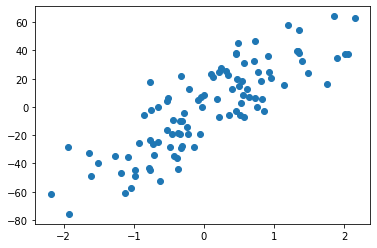

In [4]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X, y)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

<ipython-input-5-b2f5f7298bb5>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  l.fit(X_train, y_train)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11193.041458306063, tolerance: 7.295484597185819
  model = cd_fast.enet_coordinate_descent(


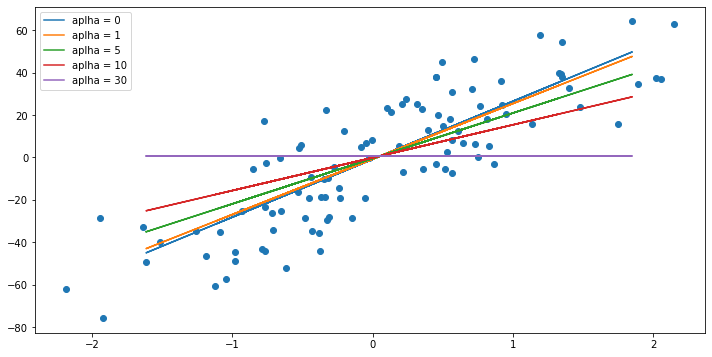

In [5]:
alphas = [0, 1, 5, 10, 30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    l = Lasso(alpha = i)
    l.fit(X_train, y_train)
    plt.plot(X_test, l.predict(X_test), label = 'aplha = {}'.format(i))
plt.legend()
plt.show()

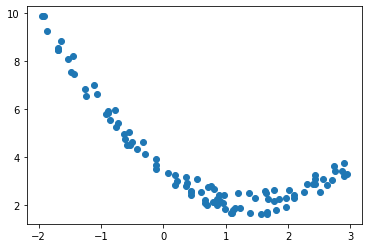

In [20]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.rand(m, 1)
plt.scatter(x1, x2)
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.745275950511612, tolerance: 0.04543615124990064
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.757571183444966,

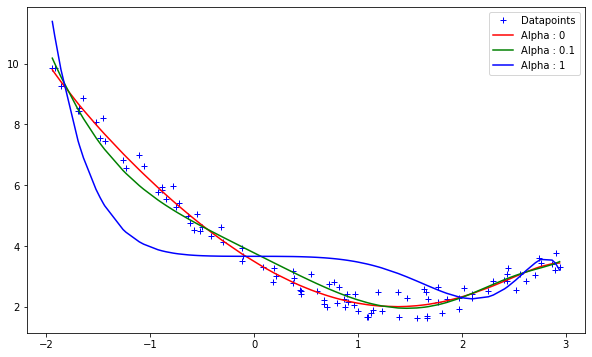

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label ='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], c, label = 'Alpha : {}'.format(alpha))
    
plt.legend()
plt.show()

[]